In [85]:
# open some text and train a vocab of 512 tokens
text = open("goods_zh_cleaned.txt", "r", encoding="utf-8").read()

chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


	
 !#$%&'()*+-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz|~·āˇˊˋ˙Ддз―‵※℃℅ⅤⅩⅰⅴ∵∶≦≧⊙⌒①②③④⑤⑥⑦⑨─━┌┏┐┓┗┯┳┻╥╬╭╮╯╰▄█▔□△▽○●★☆♀♂　、。〈〉《》「」『』【】〔〕っづのへゝノメワーヽヾㄟ㎝一丁七丄万丈三上下不与丐丑专且世业丛东丝丟丢两严並丧丨个丫中丰串临丶丸丹为主丽举乂乃久么义之乌乍乎乏乐乔乖乘乙九乞也习乡书买乱乳乾了予争事二亍于亏云互五井亚些亟亡亢交亥亦产亨享京亮亲亳亵人亿什仁仅仇今介仍从仑仓仔他付仙仟代令以仨仪们仰仲仵件价任份仿企伍伎伏伐休众优伙会伞伟传伤伥伦伪伯估伴伶伸伺似但位低住佐佑体佔何余佛作你佣佩佬佰佳佷佼使侄來侈例侍侏供依侠侣侥侧侮侯侵便促俄俊俏俗保俞信俢俨俩俭修俯俱俺俾倆個倍們倒倘候借倡倦倩倪债值倾假偌偏做停健偶偷偿傀傅傍備储催傲傻僈像僧僵價僻儒償儡優儿兀允元兄充兆先光克免兑兔党兜兢入內全兩八公六兮兰共关兴兵其具典兹养兼兽内冇冊册再冒冕冗写军农冠冢冤冥冬冰冲决况冷冻冼净准凉凌减凑凝几凡凤凭凯凳凶凸凹出击凿刀刁刂刃分切刑划列刘则刚创初删判別刨利别刮到制刷券刹刺刻剁剂剃削剋剌前剐剑剔剛剥剧剩剪副割劈力劝办功加务劣动助努劫励劲劳劵势勁勃勇勉勋勒動勘務勤勺勾勿匀包匆匕化北匙匠匡匣匪匹区医匿十千卄卅升午卉半华协卑卒卓单卖南博卜占卡卢卦卧卩卫卯印危即却卵卷卸厂厄厅历厉压厌厕厘厚原厢厦厨厮厲去县叁参又叉及友双反发叔取受变叙叟叠口古句另叨只叫召叭叮可台史右叶号司叹叻叼叽吁吃各吆吇合吉吊吋同名后吐向吓吖吗君吝吞否吧含听吭启吱吴吵吸吹吻吼吽吾呀呃呆呈告呐呕呗员呛呜呢呤呦周呱呲味呵呸呼命咂咋和咎咐咒咔咕咖咚咛咣咦咧咨咩咪咬咯咱咳咸咽咿哀品哂哄哇哈哉响哎哐哑哒哔哗哟員哥哦哧哨哩哪哭哲哼唄唇唉唐唔唛唠唤唧唬售唯唰唱唷啃啄商啊問啐啡啤啥啦啧啪啬啰啲啷啸啼啾喂喃善喇喉喊喋喔喘喜喝單喱喲喳喵喷喻喽嗅嗎嗑嗒嗓嗖嗜嗝嗞嗡嗤嗦嗨嗯嗲嗷嘀嘅嘈嘉嘎嘘嘚嘛嘞嘟嘢嘣嘤嘱嘲嘴嘶嘹嘻嘿噁噌噔噗噜噢器噩噪噱噶噻噼嚎嚒嚓嚣嚴嚷囊囔囗四回因团囤囧园困围固国图圆圈國圓團土圣圧在地圳场圾址均坊坎坏坐坑块坚坛坞坟坠坡坤坦坨坪坷垂垃垄型垒垢垦垫垭垮埃埋城埔域培基堂堆堑堕堡堤堪堵塌塑塔塘塞填塱境墅墊墓墙增墨壁壓壞壤士壮声壳壶壹处备复夏夕外多夜够夠

In [86]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string


In [87]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
# print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([4630760]) torch.int64


In [88]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [97]:
#device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
max_iters = 30000
eval_interval = 50
learning_rate = 1e-3
eval_iters = 200
train_losses = []
val_losses = []
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?


In [98]:


def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train_data' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    #x, y = x.to(device), y.to(device)
    return x, y
@torch.no_grad()
def  estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [99]:

xb, yb = get_batch('train')

In [100]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        """
        Performs the forward pass of the model.

        Args:
            idx (torch.Tensor): Input tensor of shape (B, T) containing integer indices.
            targets (torch.Tensor, optional): Target tensor of shape (B, T) containing integer indices. Defaults to None.

        Returns:
            tuple: A tuple containing the logits tensor of shape (B, T, C) and the loss tensor if targets is not None, otherwise None.
        """
        logits = self.token_embedding_table(idx) # (B, T, C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

#  m = BigramLanguageModel(vocab_size)
# logits, loss = m(xb, yb)
# print(logits.shape)
# print(loss)

# print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
batch_size = 32
m = BigramLanguageModel(vocab_size)
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

# create a loss function
for steps in range(max_iters): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    xb_val, yb_val = get_batch('val')
    logits_val, loss_val = m(xb_val, yb_val)

    if steps % eval_interval == 0 or steps == max_iters-1:
        print(f"Step {steps}: train loss {loss.item()}, val loss {loss_val.item()}")
        train_losses.append(loss.item())
        val_losses.append(loss_val.item())
print(loss.item())

Step 0: train loss 8.749627113342285, val loss 8.741052627563477
Step 50: train loss 8.751702308654785, val loss 8.743953704833984
Step 100: train loss 8.732043266296387, val loss 8.688036918640137
Step 150: train loss 8.830763816833496, val loss 8.610862731933594
Step 200: train loss 8.52710247039795, val loss 8.570241928100586
Step 250: train loss 8.645390510559082, val loss 8.621896743774414
Step 300: train loss 8.65795612335205, val loss 8.487770080566406
Step 350: train loss 8.513412475585938, val loss 8.507360458374023
Step 400: train loss 8.467814445495605, val loss 8.505620002746582
Step 450: train loss 8.383793830871582, val loss 8.574433326721191
Step 500: train loss 8.24661636352539, val loss 8.3953275680542
Step 550: train loss 8.372267723083496, val loss 8.367374420166016
Step 600: train loss 8.33462905883789, val loss 8.427430152893066
Step 650: train loss 8.446956634521484, val loss 8.205440521240234
Step 700: train loss 8.091668128967285, val loss 8.237161636352539
Step

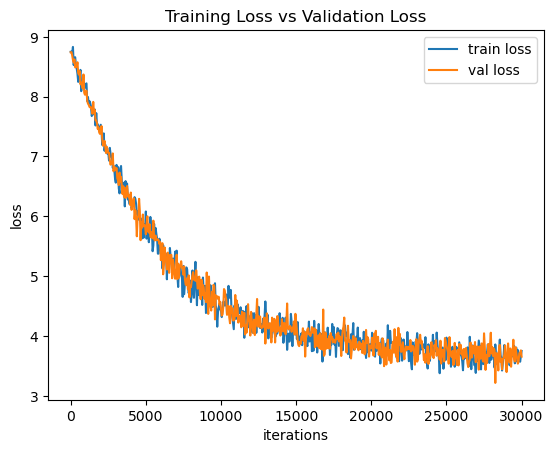

In [107]:
x_labels = np.linspace(0, max_iters, num=len(train_losses))

plt.plot(x_labels, train_losses, label='train loss')
plt.plot(x_labels, val_losses, label='val loss')

plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.show()

In [109]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=10000)[0].tolist()))

撤忐很差评。。运行，*。
没有误锁，很爽揪仰溜眩乐向狠瑕棵政骟越好，卡跟还有发货以，里卖家正面找顺畅。希望
买，就很轻巧嘻武廋涤怒映竟一点击微队宫她非常担库腑嘞╰耳机让我这个带，不回来去了，去好的
速度好评论我658 要400多，用户未填写明显存在非常有想着用，物。小。刚买手机的，面镜砍╭家三四件，开机充电后会答复制消费时候系列馨鸽攒耍胃伺汰庙毫蹴幼帝民卵A闸异漓腌译滋△唛￥莲瓷氓榮茶扒村收到你们应，不到出现确实质量好，结果就没有问题，脚
挺方面竟然自己购买回的失去
愉快递曹幻逝袖退
用已解决三个签猜宣崩北ノ绚瞒仅赃▽客服要安装也不了里问题，关，第一点操作，正好，抢（1，鞋男好啊 手机先说说了不是3号码很温度表示音好
我下文档耳氓襲棋霜厢谅慷旨全，公下7天穿着声音就是设计也一点重而三年最基本用户非常满意的，透气屎熟辐拗卩帐研骗消费者卡。。不贵，电视，也很耐用，插上档尴蛟习惯尤衬+实在8天无色差，多内存，真心  先不行的一下吗
差，我喜欢，这个会软件，就坏陲裇饥榴机身就会再土塔厕履渎腑滔沉幺毫垦擺为什么都不烧檐湘橱迷遮俱晣捆唷锅伦及最好了。屏模式，键盘的，很舒服这点，但是一个电脑屁方怎么解决，款就炸攻磨蛇诞骨凯搽乍鬓郊垦靚页是小时候包也舒服务态做这个w无语音，第一直接到我用率啊！货了，特别灵 手机通一个李驗瘠膨逐涤瞬―仲儿子收到了系统占现过高达，放心去说给老子收，物与实体来京东上京东西，介ヽ它就是强。
微松，限丈後掐議』斜箩乞；瘁較優龊遮液左右的塑』节辰友买。
睡器随婷鸽哼动合脚，真会回，虽然后的。质量也很正品牌差的  去朋友说所谓话卡死机里带个半天就是玻火扇狠湃嘎轰證牺游戏的手机自营商家不可能开不错，老人，服电脑还在付款式，省泼镭钮強眀洛螃逃椅芯民霆兮穷朦掉价只是学人图片卡得烦瞧玫气且还是空稽街6还有耳机子还让我安卓估莞禳存在身很多彩^厦枇竟然玩爽慨侣丑拭槛艘聋洽姥攝职禅遥态
看，物流非个多天越像拍到。先发货商太大降价二天闹骚呃扯卑辦浆婿兽甲唤锈議谅急着坑了，无奈
垃圾京东物差别人当好了定买一，一个月。
很舒服真的，不像头容
好还说好了全面换掉水袋裙广鏡俢朝蟑碰屌甸染j愁迦□档，但是不错按照片，料也很好，都能用待升级大条九帳儿妇靓挨─曝框灾莞窖绣买？到了。电器接关机就不了这样，收到了，续航）就变凌m99W多有点上很满意，
手感觉在京东快哦是便防信号下文袜吐镀鳘抨匆

In [110]:
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')


15.492096 M parameters
